<center>
    
# **Call Center data exploration**
    
</center>

The data for this project has Call Center records from the year 2019. The Call Center Managers want to measure its performance based on certain metrics. The managers want to rise the metrics by improving the Workforce Management (WFM) process of scheduling and staffing agents

In [4]:
from utils import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,6)

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

**Load one month**

Load the information for the month of January 2019.

In [5]:
PATH = './data'
MONTH = '/01-january.csv'

data = pd.read_csv(PATH + MONTH, parse_dates=['start_date'])
data.set_index('start_date', inplace=True)

data.drop(columns=['id_agn', 'id_ccl', 'id_cont', 'id_cmpg', 'id_sent', 'id_chan', 'id_rsn'], inplace=True)

Print out the first record. 

In [6]:
data.iloc[0]

abandon                    1
prequeue                   5
inqueue                  153
agent_time                 0
postqueue                  0
total_time                 0
sla                      NaN
contact_id      03143753e587
master_id       22143753e587
date              2019-01-01
start_time          00:00:00
abandon_time             158
Name: 2019-01-01 00:00:00, dtype: object

The data store in January is normalized. The only information useful fo the analysis is that corresponding to the times in queues the contacts were.

**Frequency**

The frequency of the data can not be inferred with pandas. However, it is know in the call center management that hourly, the rates of incoming calls changes. It is a good idea to resample all the data hourly

In [7]:
# No inferred frequency
pd.infer_freq(data.index)

In [8]:
hourly = data.resample('H').sum()
hourly.head()

,abandon,prequeue,inqueue,agent_time,postqueue,total_time,sla,abandon_time
start_date,,,,,,,,
2019-01-01 00:00:00,11,173,293,0,1,0,0.0,467
2019-01-01 01:00:00,3,136,0,0,0,0,0.0,136
2019-01-01 02:00:00,1,37,0,0,0,0,0.0,37
2019-01-01 03:00:00,2,40,0,0,0,0,0.0,40
2019-01-01 04:00:00,0,0,0,0,0,0,0.0,0


**Disclaimer:** The resample method in pandas fills the missing values with zero. This is fix in the scripts under utils

Plot the number of abandonded calls by hour during the month of January. It shows a weekly pattern.

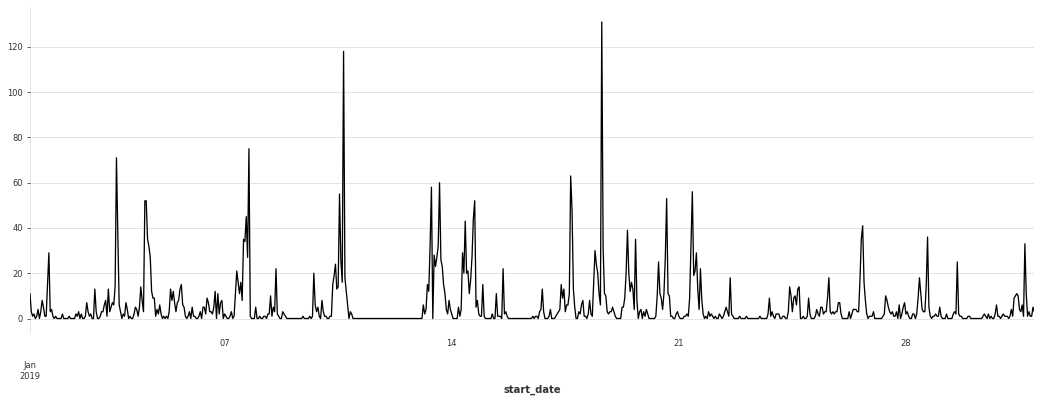

In [9]:
hourly.abandon.plot();

**Disclaimer:** The variable of interest is the daily calls volume per hour. This variable is not present in the original dataset, but its obtained in the utils scripts

The scripts under utils manipulate the data to get usable data for prediction. The data goes through the following pipelines:

1. Selects the columns `abandon`, `prequeue`, `inqueue`, `agent_time`, `postqueue`, `total_time` and `sla`
2. Aggregate by day, hour and month of the year
3. Creates the `calls_volume` variable by counting the number of records for the day, hour and month
4. Fills missing hourly data using mean values for the month an hour

## **Import all the data of the year**

In [10]:
# Load the yearly dataframe for prediction
yearly = get_yearly_frame()
yearly.sample(5,
              random_state = 42)

,,,abandon,prequeue,inqueue,agent_time,postqueue,total_time,sla,calls_volume
day,hour,month,,,,,,,,
10,9,9,4.0,9.948980,16.051020,144.061224,0.112245,169.051020,1.0,98.0
20,17,8,8.0,29.375000,0.000000,0.000000,0.000000,0.000000,-1.0,8.0
7,18,9,1.0,13.920635,0.365079,217.904762,0.095238,232.142857,1.0,63.0
16,21,11,6.0,8.685393,40.943820,195.235955,0.224719,240.775281,1.0,89.0
19,10,5,53.0,9.992126,138.637795,136.196850,0.094488,244.779528,1.0,127.0


## **Getting the Calls Volume per hour on first of january**

Select the data for the first of January 2019. The aggregated values shows that the activity was rather low in that day.

In [11]:
get_aggregated_daily_frame_for(day=1, data=yearly).loc[:,:,1].head(15)

abandon   prequeue    inqueue  agent_time  postqueue  \
day hour month                                                         
1   0    1         11.0  15.727273  26.636364    0.000000   0.090909   
    1    1          3.0  45.333333   0.000000    0.000000   0.000000   
    2    1          1.0  37.000000   0.000000    0.000000   0.000000   
    3    1          2.0  20.000000   0.000000    0.000000   0.000000   
    5    1          1.0  54.000000   0.000000    0.000000   0.000000   
    6    1          4.0   7.200000  10.000000   10.800000   0.000000   
    7    1          0.0   9.575000   5.075000  150.575000   0.250000   
    8    1          3.0   8.989583  15.729167  186.229167   0.177083   
    9    1          8.0   9.621359  20.184466  161.300971   0.145631   
    10   1          5.0   9.906977  13.720930  180.976744   0.244186   
    11   1          1.0   8.954023  10.126437  234.931034   0.172414   
    12   1          1.0  10.789474   1.508772  145.368421   0.105263   
    13   1         15.0  10.385714  42.585714  129.971429   0.242857   
    14   1         29.0  19.344828   0.000000    0.000000   0.206897   
    15   1          3.0  30.666667   0.000000    0.000000   0.000000   

                total_time  sla  calls_volume  
day hour month                                 
1   0    1        0.000000 -1.0          11.0  
    1    1        0.000000 -1.0           3.0  
    2    1        0.000000 -1.0           1.0  
    3    1        0.000000 -1.0           2.0  
    5    1        0.000000 -1.0           1.0  
    6    1       15.400000 -1.0           5.0  
    7    1      165.475000  1.0          40.0  
    8    1      210.208333  1.0          96.0  
    9    1      188.048544  1.0         103.0  
    10   1      201.616279  1.0          86.0  
    11   1      253.540230  1.0          87.0  
    12   1      157.771930  1.0          57.0  
    13   1      170.914286  1.0          70.0  
    14   1        0.000000 -1.0          29.0  
    15   1        0.000000 -1.0           3.0

Plotting the data corresponding to the first of January shows the calls follow a normal distribution calls volume with centered at 10:00 am with mean calls volume of 100 calls per hour

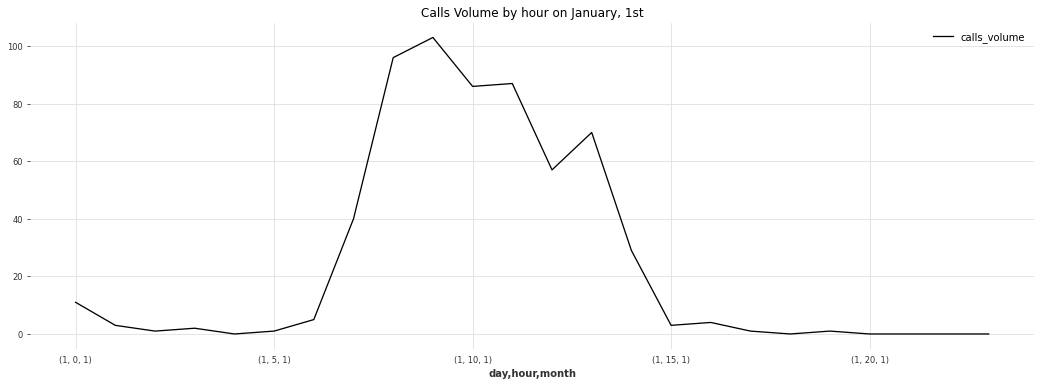

In [12]:
get_aggregated_daily_frame_for(day=1, data=yearly).loc[:, :, 1][['calls_volume']].sort_index().plot(figsize=(18,6), 
                                                                                                    title="Calls Volume by hour on January, 1st");

## **Getting the Calls Volume at 10 hrs in January**

The hourly rates are important and relevant. For example, considering all the calls volume at 10:00 in the month of January 2019 shows a weekly pattern suggesting the calls at a given hour is related to the day of the month

Plotting the data shows the weekly pattern with just slightly changes in the form of the distributions in between.

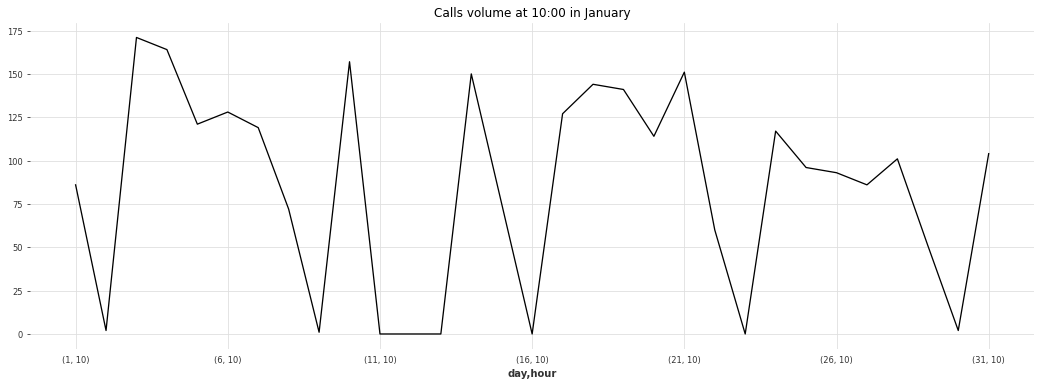

In [13]:
get_aggregated_hourly_frame_for(hour=10, data = yearly)['calls_volume'].loc[:,:,1].plot(figsize=(18,6),
                                                                                        title="Calls volume at 10:00 in January");